In [5]:
import numpy as np
from random import sample
import pandas as pd
import matplotlib.pyplot as pl

In [6]:
def KMeans(data, k = 2, norm = np.linalg.norm, maxIter = 15, tolerance = 0.01, silent = True):
    
    '''
    KMeans Algorithm
    
    ----------
    Paramaters
    ----------
    
    - data: Data Matrix that will be clusterized.
    - k (optional): Integer Number of Clusters. Default value is 2.
    - norm (optional): Function. Vector Space Norm. Default
        value is euclidean norm (numpy.linalg.norm).
    - maxIter (optional): Integer. Maximum iterations that the
        algorithm will be executed. Default value is 15.
    - tolerance (optional): Float. Default value = 0.01.
    - silent(optional): Boolean. Show log if False. Default value True.
        
    ------
    Return
    ------
    Tupla clusters, centroids. Clusters is a list (size k) and each list
        member is a data Matrix of points. Centroids is a list (size k)
        with last centroids calculated.
    '''
    
    data = np.array(data)
    centroids = []
    n = len(data)
    m = len(data[0])
    # Inicialice centroids randomly
    randomIndex = sample(range(0, n), k)
    for i in range(0, k):
        centroids.append(data[randomIndex[i]])
    
    isOptimal = False;
    iterations = 0;
    
    while (not isOptimal and iterations < maxIter):
        
        # Inicialize k  empty clusters
        clusters = []
        for i in range(0, k):
            clusters.append([])
        
        iterations += 1
            
        # Classify each individual in the cluster which minimices distance to its centroid.
        for x in data:
            distances = [norm(x - i) for i in centroids]
            minCluster = distances.index(min(distances))
            clusters[minCluster].append(x)
        
        clusters = [np.array(i) for i in clusters]

        auxCentroids = list(centroids)

        #New centroids are the mean of each cluster
        for i in range (0, k):
            centroids[i] = [np.average([clusters[i][:,j]]) for j in range(0, m)]


        if max([norm(np.array(centroids[i]) - np.array(auxCentroids[i]))
                /norm(auxCentroids[i]) for i in range (0, k)]) <= tolerance:
            isOptimal = True

                #If at least a centroid change substantially, then we keep iterating
    if (not silent):
        print('number of iterations:', iterations)
    return clusters, centroids

In [7]:
def clusterPlot(clusters, x, y, centroids):
    '''
    Draw all members of a cluster list and centroids
    
    ----------
    Paramaters
    ----------
    
    - clusters: Clusters list and each cluster is a data Matrix of points
    - x: coordinate x in graphic.
    - y: coordinate y in graphic.
    - centroids: List of points.
    '''
    for c in clusters:
        pl.plot(c[:,x], c[:,y], 'o')
    for c in centroids:
        pl.plot(c[x], c[y], 'rx')
    pl.show()

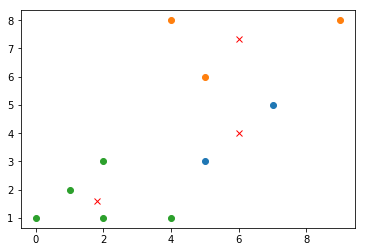

In [8]:
data = np.array(np.mat('2 3;4 1;5 3;2 1;9 8;0 1;1 2;5 6;7 5;4 8'))
clusters, centroids = KMeans(data,3)
clusterPlot(clusters,0,1, centroids)

number of iterations: 5


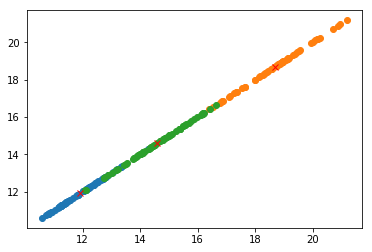

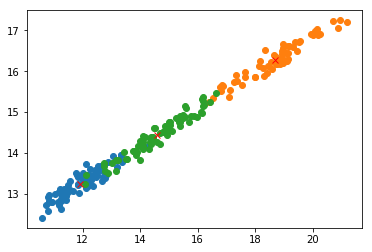

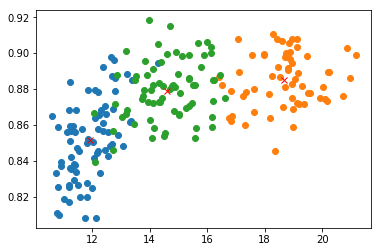

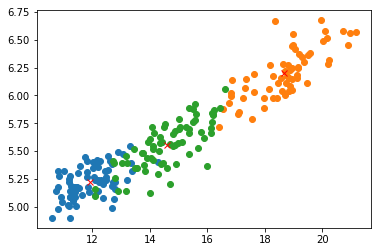

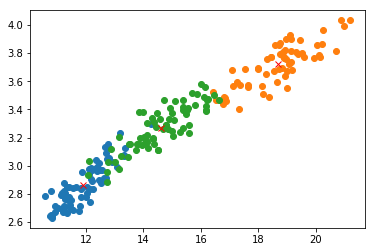

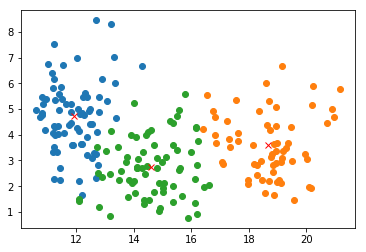

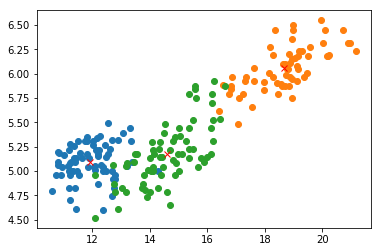

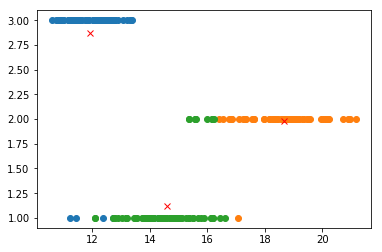

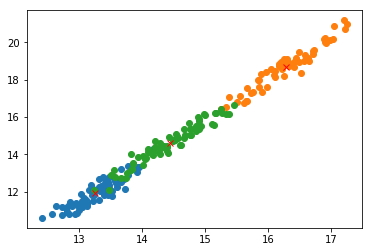

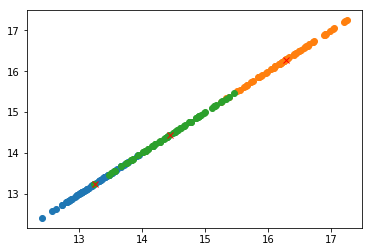

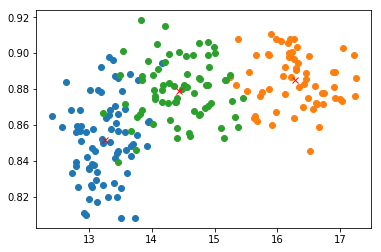

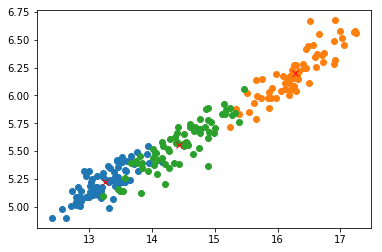

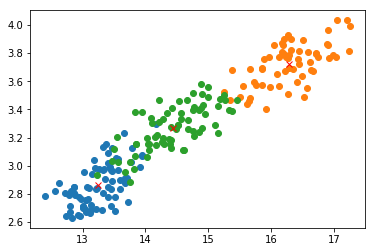

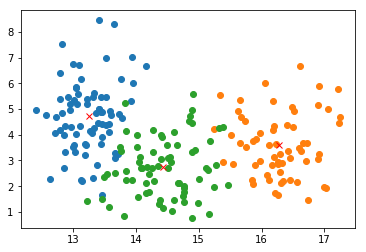

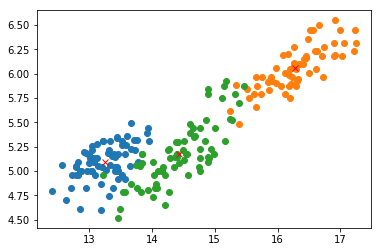

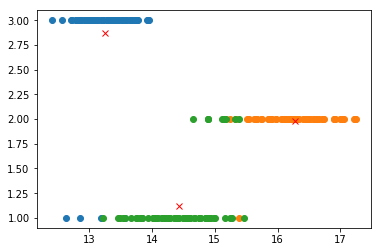

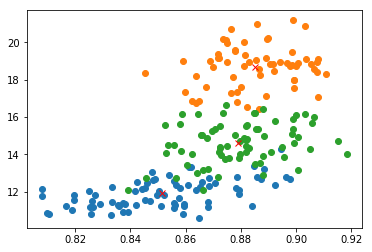

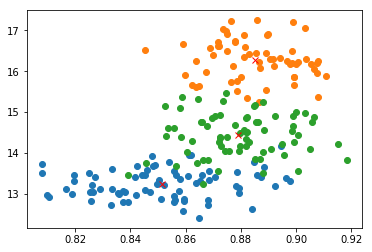

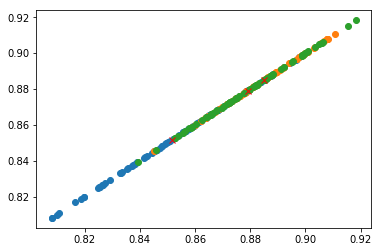

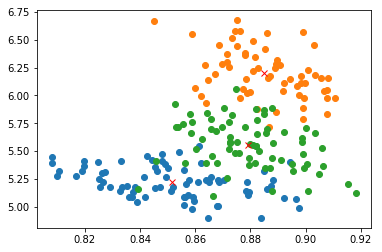

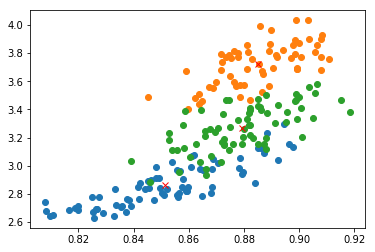

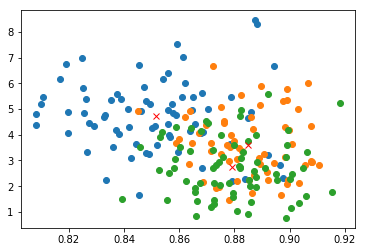

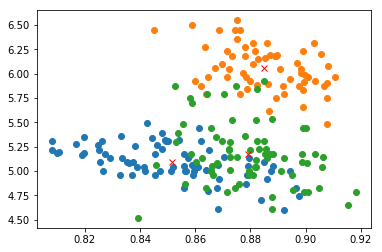

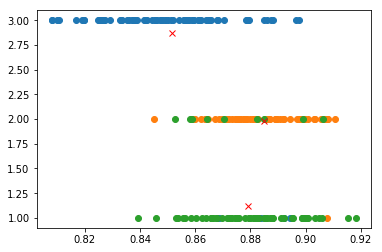

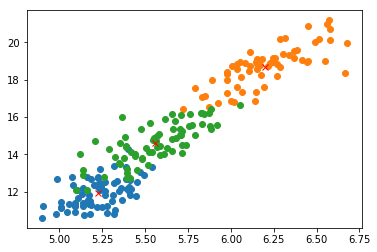

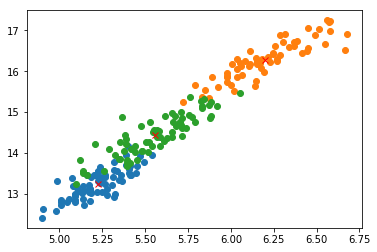

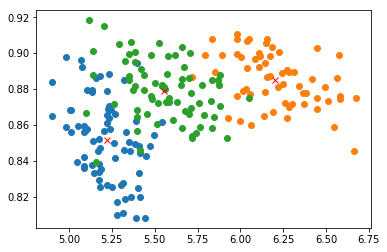

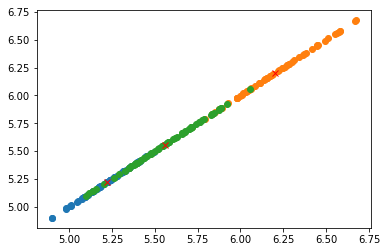

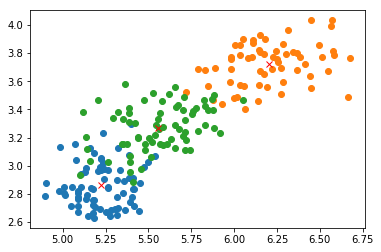

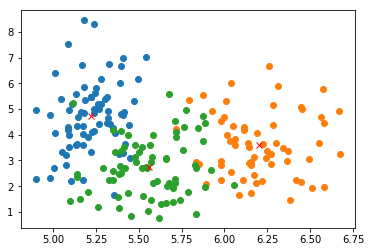

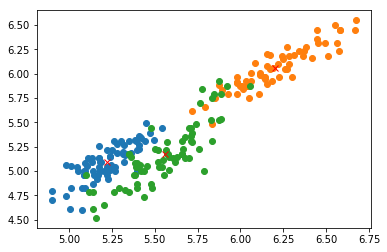

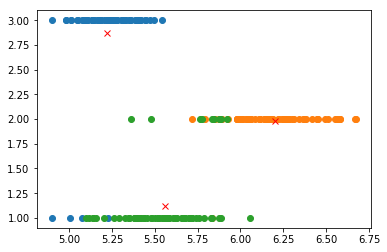

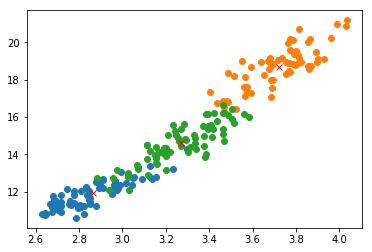

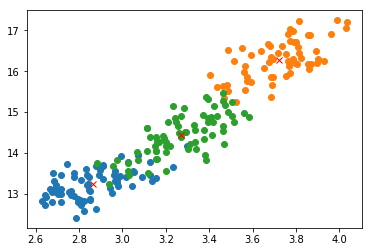

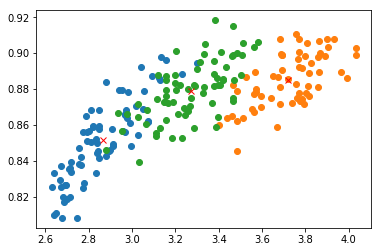

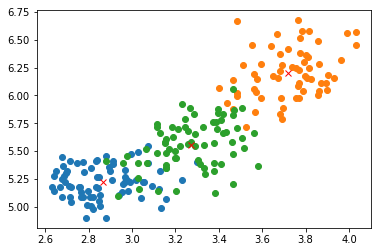

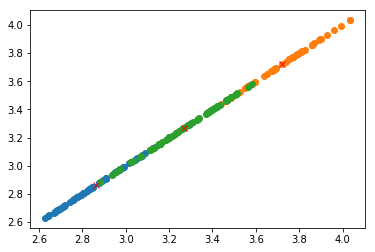

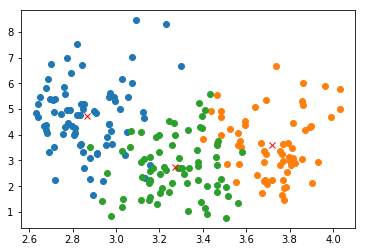

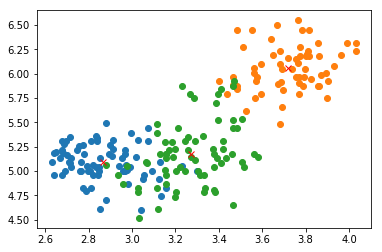

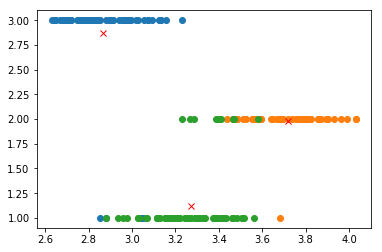

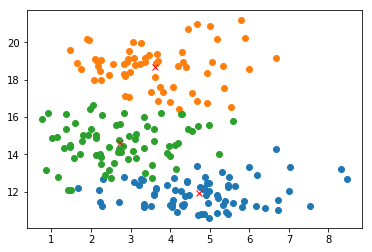

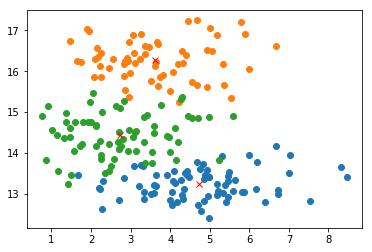

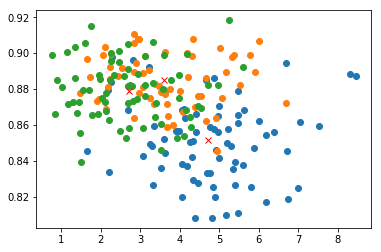

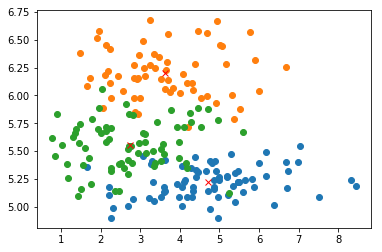

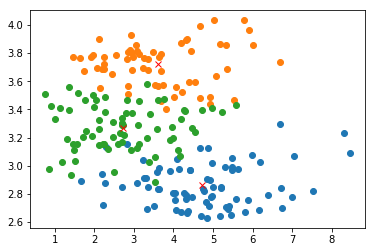

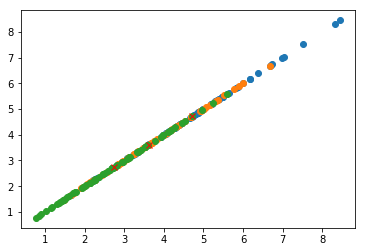

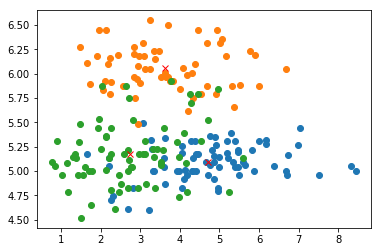

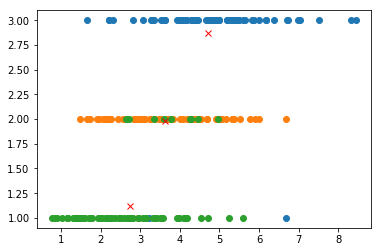

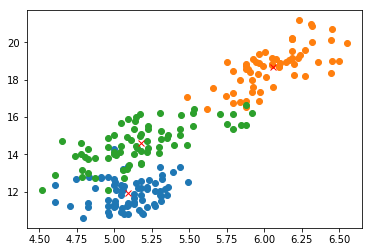

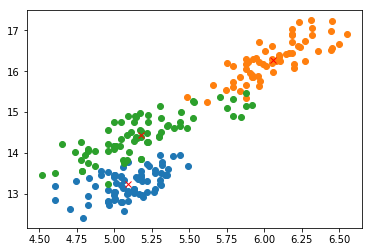

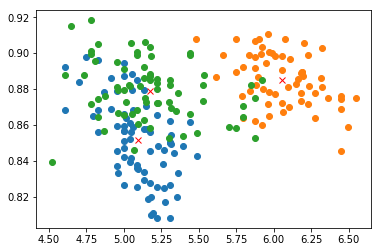

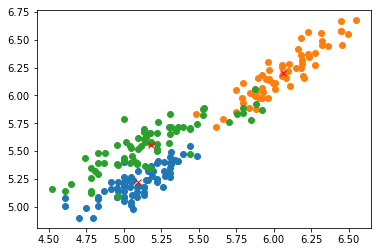

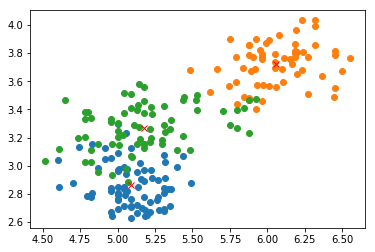

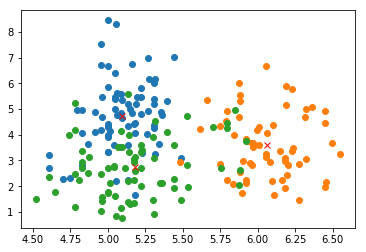

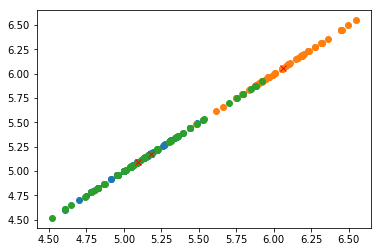

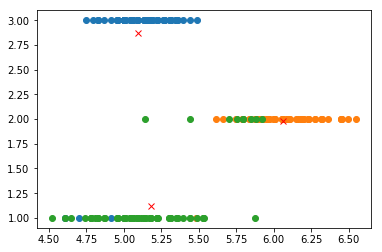

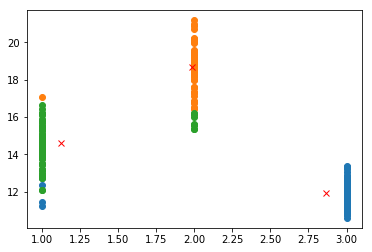

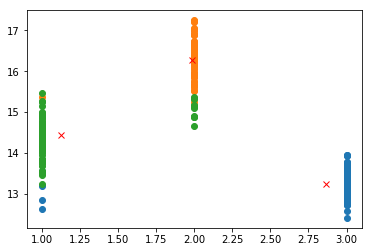

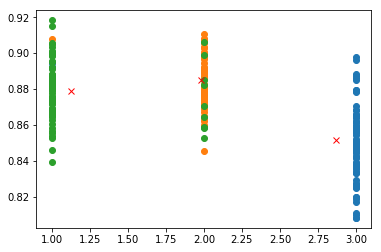

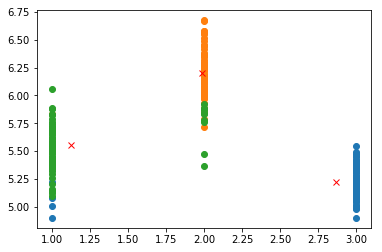

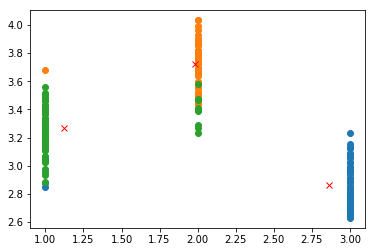

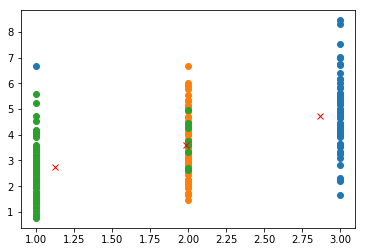

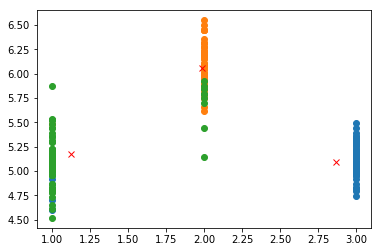

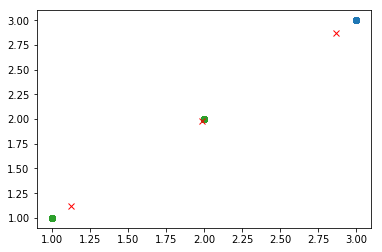

In [11]:
data = pd.read_csv('seeds_dataset.txt')
data = data.values
clusters, centroids = KMeans(data, k = 3, tolerance = 0, silent = False)
for i in range (0,8):
    for j in range (0,8):
        clusterPlot(clusters,i,j, centroids)